# Krzysztof Tomala - Explainable AI - Homework 2

# Report

# List of features with short descriptions

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels visible in fluoroscopy (0-3)

cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

thal : Thalium Stress Test result
    
slope : the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

oldpeak : ST depression induced by exercise relative to rest

# Tasks

    Compare LIME for various observations in the dataset. How stable are these explanations?

Plots for first observation for seeds 0, 1 and 2:

![image](stability.png)

I would say that the explanations are very stable. There are some slight differences in the order of importance of features, but the values are very similar between the seeds.

    Compare LIME with the explanations obtained using SHAP. What are the main differences between them?

I will focus on the first 2 observations in dataset

LIME plots:

![image](lime_2_obs.png)

SHAP plots:

![image](waterfall_plot_obs1.png)

![image](waterfall_plot_obs2.png)

The results are very similar. For the first observation top 6 featers in terms of importance are exactly the same in both methods, they just differ in order, but the sign of their attribution is always the same.  
The situation is alike for the second observation. Only very visible change is that in shap cp_3 has small attribution, while it has high attribution in lime, but this may come from the randomness of generating the importances.


    Compare LIME between at least two different models. Are there any systematic differences across many observations?

LIME plots for logistic regression:

![image](lr_plot.png)

We can sometimes see small differences in order of the importance of the features, but generally their attributions are very similar for both models.

    Comment on the results obtained in (3), (4) and (5)

When it comes to (3) I think it is very nice, that our method, at lease when used for forest based classifiers is stable, because otherwise we would have to somehow average the outputs, which could require much more computations.  
I think it is good, that both methods give generally similar results, because if same feature could give us strong positive attribution in one of the methods and strong negative attribution in the other one, then it would mean that one of the methods is not working properly.  
Results are very similar, which was to be expected, beacause SHAP explanation were arso similar for these 2 models. One thing worth noting is that SHAP has shown that logistic regression is using the top feature much stronger then the forest, while the attributions in LIME method are very similar for both models.

# Appendix

In [1]:
import pandas as pd
import sklearn
from sklearn import ensemble
import dalex as dx
import lime

In [2]:
dataset = pd.read_csv('heart.csv')
dataset = pd.get_dummies(dataset)
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
features = dataset.drop(columns='output')

#fixing typo in data
features['thalach']=features['thalachh']
features = features.drop(columns='thalachh')

features['slope']=features['slp']
features = features.drop(columns='slp')

features['ca']=features['caa']
features = features.drop(columns='caa')

features = pd.get_dummies(features, columns=['cp', 'thall'])

features
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, dataset['output'], test_size=0.3, random_state=0)
X_train

,age,sex,trtbps,chol,fbs,restecg,exng,oldpeak,thalach,slope,ca,cp_0,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3
137,62,1,128,208,1,0,0,0.0,140,2,0,0,1,0,0,0,0,1,0
106,69,1,160,234,1,0,0,0.1,131,1,1,0,0,0,1,0,0,1,0
284,61,1,140,207,0,0,1,1.9,138,2,1,1,0,0,0,0,0,0,1
44,39,1,140,321,0,0,0,0.0,182,2,0,0,0,1,0,0,0,1,0
139,64,1,128,263,0,1,1,0.2,105,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,132,247,1,0,1,0.1,143,1,4,1,0,0,0,0,0,0,1
192,54,1,120,188,0,1,0,1.4,113,1,1,1,0,0,0,0,0,0,1
117,56,1,120,193,0,0,0,1.9,162,1,0,0,0,0,1,0,0,0,1
47,47,1,138,257,0,0,0,0.0,156,2,0,0,0,1,0,0,0,1,0


In [4]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(X=X_train,y=y_train)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,forest.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,forest.predict(X_test))}')

forest_accuracy = sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))
forest_recall = sklearn.metrics.recall_score(y_test,forest.predict(X_test))
forest_precision = sklearn.metrics.precision_score(y_test,forest.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,forest.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,forest.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,forest.predict(X_train))}')

Accuracy: 0.8461538461538461
Recall: 0.8936170212765957
Precision: 0.8235294117647058

Results on train dataset:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [5]:
obs = list(range(2))
for i in obs:
    obs1 = X_test.iloc[obs[i]].to_numpy().reshape(1,-1)
    print(obs1)
    print(forest.predict(obs1))

X = X_test
y = y_test
predict = lambda m, d: m.predict(d)
explainer = dx.Explainer(forest, X_test, y_test, predict_function=predict, label="GBM")

[[ 70.    1.  145.  174.    0.    1.    1.    2.6 125.    0.    0.    1.
    0.    0.    0.    0.    0.    0.    1. ]]
[0]
[[ 64.    1.  170.  227.    0.    0.    0.    0.6 155.    1.    0.    0.
    0.    0.    1.    0.    0.    0.    1. ]]
[1]
Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : GBM
  -> predict function  : <function <lambda> at 0x7fe64710b9d0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.56, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.044, max = 1.0
  -> model_info        : package skle

/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
explainer.model_performance(cutoff=y.mean())

,recall,precision,f1,accuracy,auc
GBM,0.893617,0.823529,0.857143,0.846154,0.844536


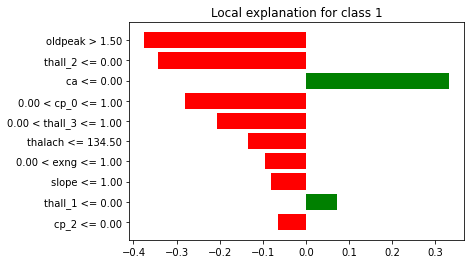

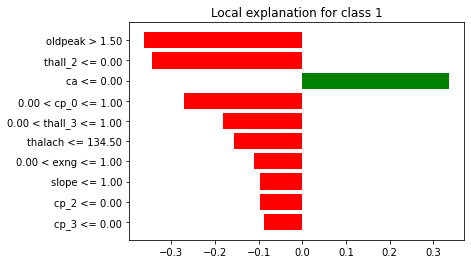

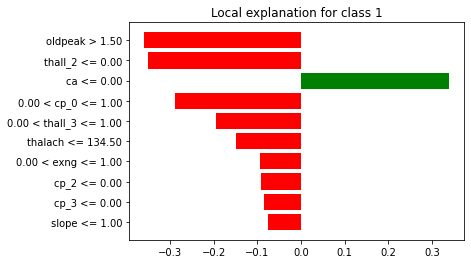

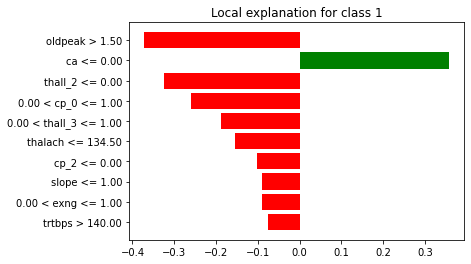

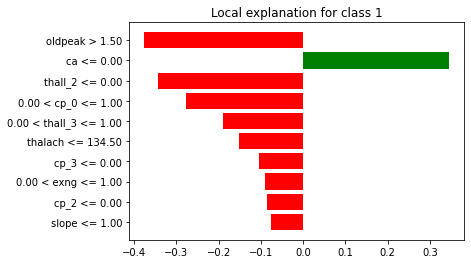

In [13]:
import random
import numpy as np


for i in range(0,5):
    random.seed(i)
    np.random.seed(i)
    observation = X.iloc[[0]]
    explainer.predict(observation)
    explanation = explainer.predict_surrogate(observation)
    explanation.plot()

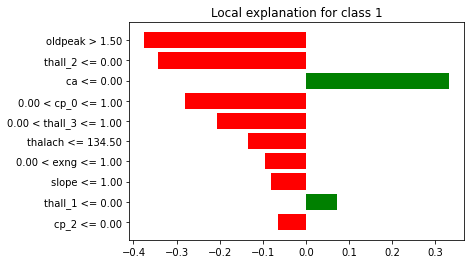

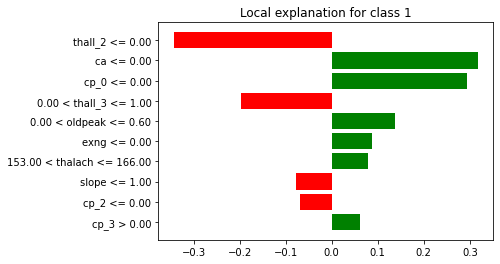

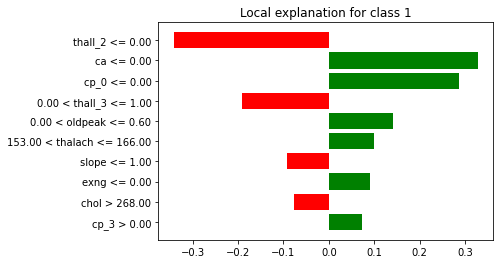

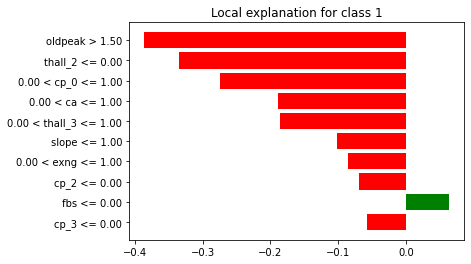

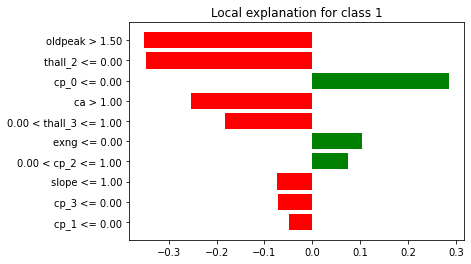

In [14]:
import random
import numpy as np
random.seed(0)
np.random.seed(0)


for i in range(0,5):
    observation = X.iloc[[i]]
    explainer.predict(observation)
    explanation = explainer.predict_surrogate(observation)
    explanation.plot()

In [8]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression(max_iter=500)
model.fit(X=X_train,y=y_train)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,model.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,model.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,model.predict(X_test))}')

model_accuracy = sklearn.metrics.accuracy_score(y_test,model.predict(X_test))
model_recall = sklearn.metrics.recall_score(y_test,model.predict(X_test))
model_precision = sklearn.metrics.precision_score(y_test,model.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,model.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,model.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,model.predict(X_train))}')

Accuracy: 0.8241758241758241
Recall: 0.8936170212765957
Precision: 0.7924528301886793

Results on train dataset:
Accuracy: 0.8867924528301887
Recall: 0.940677966101695
Precision: 0.8671875


In [9]:
X = X_test
y = y_test
predict = lambda m, d: m.predict(d)
explainer = dx.Explainer(forest, X_test, y_test, predict_function=predict, label="GBM")

Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : GBM
  -> predict function  : <function <lambda> at 0x7fe644508940> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.56, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.044, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
explainer.model_performance(cutoff=y.mean())

,recall,precision,f1,accuracy,auc
GBM,0.893617,0.823529,0.857143,0.846154,0.844536


In [11]:
explanation = explainer.predict_surrogate(observation)
explanation.result

,variable,effect
0,oldpeak > 1.50,-0.379133
1,thall_2 <= 0.00,-0.317623
2,ca > 1.00,-0.290463
3,cp_0 <= 0.00,0.263312
4,0.00 < thall_3 <= 1.00,-0.206344
5,exng <= 0.00,0.116485
6,slope <= 1.00,-0.102499
7,thall_1 <= 0.00,0.077895
8,0.00 < cp_2 <= 1.00,0.069532
9,cp_1 <= 0.00,-0.045747


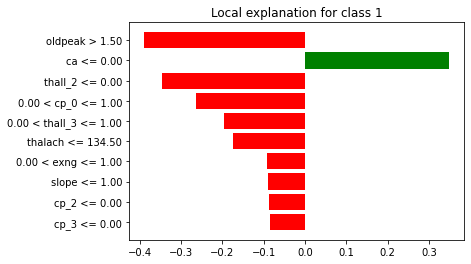

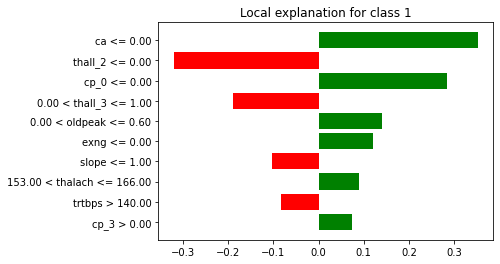

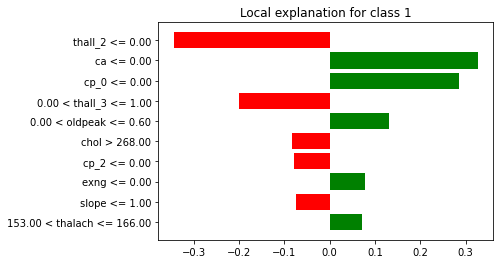

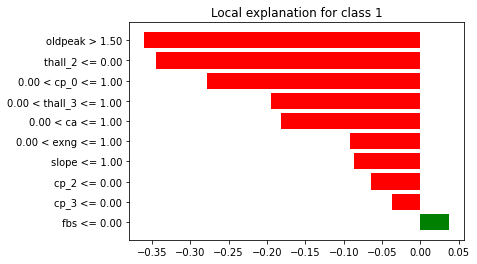

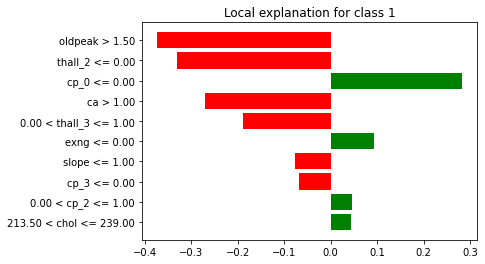

In [12]:
for i in range(0,5):
    observation = X.iloc[[i]]
    explainer.predict(observation)
    explanation = explainer.predict_surrogate(observation)
    explanation.plot()